# Raziskovanje mesta


## Za oceno 6

Za to oceno naj bodo križišča, po katerih vozi kolesar, označena z eno samo črko. Poznamo poti, po katerih sta vozila dva kolesarja. 
Napiši funkciji

- `skupna_krizisca(pot1, pot2)`, kjer sta `pot1` in `pot2` niza, ki predstavljata poti, vrne število križišč, ki sta jih obiskala oba kolesarja. `skupna_krizisca("ABCDCAB", "DAEBA")` vrne `3`, saj sta oba obiskala A, B in D (A celo večkrat, vendar vsako križišče štejemo samo enkrat).
- `skupni_odseki(pot1, pot2)` vrne število povezav, ki sta jih prevozila oba kolesarja. `skupni_odseki("ABCDCAB", "DABCABCD")` vrne `4`, saj sta oba prevozila A-B, B-C, C-D in C-A. A-B sta sicer prevozila dvakrat, vendar vsako povezavo štejemo le enkrat. Povezave so usmerjene - A-B ni isto kot B-A.

### Rešitev

Prva funkcija mora vrniti velikost preseka množic križišč.

In [2]:
def skupna_krizisca(pot1, pot2):
    return len(set(pot1) & set(pot2))

Za drugo moramo sestaviti množico prevoženih odsekov. Odseke dobimo z `zip(pot1, pot1[1:])`; ker potrebujemo množico, jih pač pretvorimo v množico, `set(zip(pot1, pot1[1:]))`. Enako storimo še z drugo potjo in že imamo

In [3]:
def skupni_odseki(pot1, pot2):
    return len(set(zip(pot1, pot1[1:])) & set(zip(pot2, pot2[1:])))

## Za oceno 7

- Napiši funkcijo `preberi_zemljevid(ime_datoteke)`, ki prejme ime datoteke, v kateri je shranjen zemljevid v naslednji obliki:

    ```python
    PeF-EF: robnik, bolt
    PeF-FRI: robnik, avtocesta
    FRI-BF: 
    BF-FE: robnik, trava, pešci
    ```

    Vsaka vrstica predstavlja povezavo. Levo od dvopičja imamo začetno in končno točko povezave, ločeno z `-`. Ime križišča je lahko sestavljeno iz več znakov. Dvopičju vedno sledi presledek, nato pa seznam veščin. Veščine so ločene z (levo stično) vejico.

    Funkcija mora vrniti zemljevid v obliki slovarja, katerega ključi so terke z imenoma križišč, pripadajoča vrednost pa seznam veščin, ki jih zahteva povezava. V gornjem primeru vrne

    ```
    {('BF', 'FE'): {'pešci', 'robnik', 'trava'},
     ('FRI', 'BF'): set(),
     ('PeF', 'EF'): {'bolt', 'robnik'},
     ('PeF', 'FRI'): {'avtocesta', 'robnik'}}
    ```

- Napiši funkcijo `zapisi_zemljevid(ime_datoteke, zemljevid)`, ki prejme ime datoteke in zemljevid v obliki slovarja, kakršen je gornji. Funkcija zapiše zemljevid v datoteko, enako gornji obliki.

    Testi za to funkcijo delujejo tako, da jo pokličejo, da shrani zemljevid, nato pa pokličejo kar funkcijo `preberi_zemljevid(ime_datoteke)`, da preverijo, ali je zapisani zemljevid pravilen. Če testi javijo napako, je lahko problem tudi v funkciji `preberi_zemljevid` (čeprav najbrž ne, saj je ta stestirana na istih podatkih v ločenem testu).


### Rešitev

In [4]:
def preberi_zemljevid(ime_dat):
    zemljevid = {}
    for vrstica in open(ime_dat, encoding="utf-8"):
        odsek, vescine = vrstica.strip("\n").split(": ")
        zemljevid[tuple(odsek.split("-"))] = set(vescine.split(", ")) - {""}
    return zemljevid

def zapisi_zemljevid(ime_dat, zemljevid):
    f = open(ime_dat, "w", encoding="utf-8")
    for odsek, vescine in zemljevid.items():
        f.write(f"{odsek[0]}-{odsek[1]}: {', '.join(sorted(vescine))}\n")

Pri branju od vsake vrstice odluščimo nepotrebni `\n` in jo razdelimo glede na `": "` - vključno s presledkom, da se znebimo presledka za dvopičjem. Tako dobimo `odsek` in `vescine`. 

- Odsek je potrebno razbiti glede na `-` in ga pretvoriti v terko. Tako dobimo ključ.
- Veščine razbijemo glede na `", "` (spet, skupaj s presledkom za vejico) in jih spremenimo v množico. Če je seznam veščin prazen, bo `split` vseeno vrnil `[""]` in dobili bomo množico `{""}` namesto prazne množice. To uredimo preprosto tako, da od dobljene množice odštejemo `{""}`. Če množica veščin slučajno ne vsebuje presledka, se ne bo zgodilo nič hudega.

Pisanje je še preprostejše: zapišemo niz, ki vsebuje začetek in konec odseka z `-` vmes, potem `: ` in nato z vejico združene veščine (če imamo kakšno). Pa `\n` na koncu ne pozabimo.

## Za oceno 8

Kolesarja vozita kot v nalogi za oceno 6. Za vsak odsek porabita enako časa. Napiši funkcijo `skupni_odsek(pot1, pot2)`, ki vrne dolžino najdaljšega skupnega odseka poti. Pri tem morata biti odseka "poravnana", na istem mestu, se pravi tako, da ga kolesarja dejansko prevozita istočasno.

Klic 

```python
#              vv  vvvvv   vvv
skupni_odsek("ABCDEFGHIJKLMNOP",
             "XBDEMFGHIJXOANOP")
```

vrne 5, saj je najdaljši skupni odsek FGHIJK.

Klic `skupni_odsek("ABCDEF", "XABCDEF")` vrne 0, saj kolesarja ne prevozita ABCDEF istočarno -- prvi je vedno eno križišče pred drugim.


### Rešitev

Tole je še najbolj zoprna naloga. Iti moramo po obeh poteh hkratni, `for a, b in zip(pot1, pot2):`. Če sta križišči (`a` in `b`) enaki, povečamo števec enakih križišč (`ta`). Če sta različni zmanjšamo števec na `0`. Vsakič, ko števec povečamo, preverimo, ali je večji kot kdajkoli.

In [5]:
def skupni_odsek(pot1, pot2):
    naj = 0
    ta = 0
    for a, b in zip(pot1, pot2):
        if a == b:
            ta += 1
            if ta > naj:
                naj = ta
        else:
            ta = 0
    return naj

## Za oceno 9

Ker je prva prioriteta Mestne občine Ljubljana varnost kolesarjev, so sprejeli predpis, po katerem smemo iz vsakega križišča voziti le v križišča, katerih ime je po abecedi kasnejše od trenutnega: iz D smemo v R, obratno pa ne.

Napiši funkcijo `uporabne_vescine(zacetek, zemljevid)`, ki vrne množico veščin, ki nam lahko pridejo prav, če začnemo svojo pot v točki `zacetek`. Klic `uporabne_vescine("R", zemljevid)` vrne `{'trava', 'lonci', 'robnik', "pešci"}`, saj iz R lahko potujemo (samo) v U in V, pri čemer potrebujemo štiri veščine, naštete v množici.

<center>
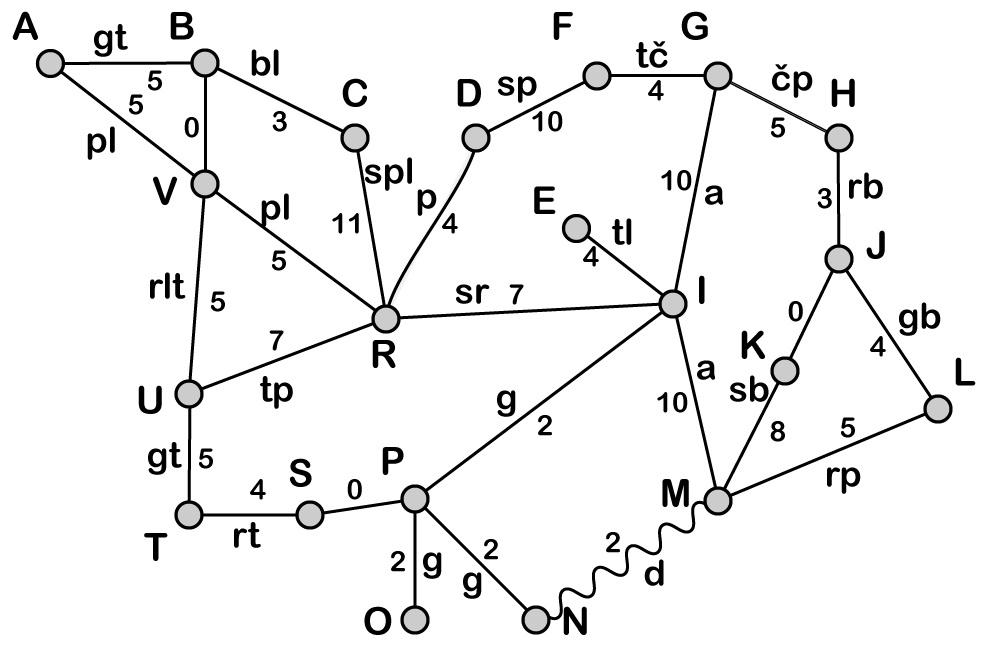</center>



### Rešitev

Gremo čez vse povezave. Naletivši na takšno, ki se začne v podani točki, preverimo, ali vodi v točko, ki je kasnejša po abecedi. Če je tako, dodamo v množico uporabnih veščin vse veščine na tej povezavi in še vse veščine, ki bi bile uporabne v nadaljevanju poti iz točke na drugi strani te povezave. Slednje dobimo z rekurzivnim klicem te taiste funkcije

In [6]:
def uporabne_vescine(zacetek, zemljevid):
    uporabne = set()
    for (x, t1), vescine in zemljevid.items():
        if x == zacetek and t1 > zacetek:
            potrebne |= vescine | uporabne_vescine(t1, zemljevid)
    return potrebne

## Za oceno 10

Napiši funkcijo `dolzina_poti(zacetek, konec, zemljevid)`, ki vrne dolžino najkrajše možne poti (to je, število povezav) od točke `zacetek` do `konec`, če smemo, kot veleva novi nori predpis, iz vsakega križišča peljati le v vozlišče, ki je kasneje po abecedi. Če pot ni možna, naj funkcija vrne `None`.

Klic `dolzina_poti("F", "U", zemljevid)` vrne `4`, saj iz F v U gremo po poti F-G-I-R-U. Po krajši poti, F-D-R-U ne smemo, ker iz F ne smemo v D.

Klic `dolzina_poti("C", "I", zemljevid)` vrne `None`, saj pot iz `C` v `I` ni možna.


### Rešitev

Rekurzivna rešitev, ki naj bi jo znali napisati slušatelji Programiranja 1 je takšna:

In [7]:
def dolzina_poti(zacetek, konec, zemljevid):
    if zacetek == konec:
        return 0
    najkrajsa = None
    for (x, t1), vescine in zemljevid.items():
        if x == zacetek and t1 > zacetek:
            naprej = dolzina_poti(t1, konec, zemljevid)
            if naprej is not None:
                dolzina = 1 + naprej
                if najkrajsa is None or dolzina < najkrajsa:
                    najkrajsa = dolzina
    return najkrajsa

Če smo že v končni točki, je dolžina poti enaka 0. Sicer pa je dolga toliko, kolikor je dolga najkrajša pot iz ene izmed točk, do katere lahko gremo iz te točke - in še 1 zraven.

Tule je malo bolj divja različica istega.

In [8]:
def dolzina_poti(zacetek, konec, zemljevid):
    if zacetek == konec:
        return 0
    return min(
        (1 + dolzina
        for dolzina in (dolzina_poti(t1, konec, zemljevid)
                        for (x, t1), vescine in zemljevid.items()
                        if x == zacetek and t1 > zacetek)
        if dolzina is not None),
        default=None
    )

Iz razlogov, ki jih boste spoznali v tretjem letniku, te rešitve niso najboljše: potencialno so lahko počasne. Za to nalogo je težko napisati dobro rekurzivno rešitev. Zato je tule rešitev brez rekurzije:

In [9]:
def dolzina_poti(zacetek, konec, zemljevid):
    kandidati = [(zacetek, 0)]
    for tocka, dolzina in kandidati:
        if tocka == konec:
            return dolzina
        kandidati += [(t1, dolzina + 1)
                       for (x, t1), vescine in zemljevid.items()
                       if x == tocka and t1 > tocka]
    return None


`kandidati` je seznam parov točk in dolžin poti do njih. V začetku je to pač točka `zacetek` in dolžina poti do nje je 0. Nato v zanki jemljemo kandidate in dodajamo v seznam kandidatov njihove sosede, vedno z za `1` večjo razdaljo. Ko naletimo na končno točko, vrnemo razdaljo do nje.

Pa še malo bolj ekonomična različica istega:

In [10]:
def dolzina_poti(zacetek, konec, zemljevid):
    krog = [zacetek]
    dolzina = 0
    while krog:
        naslednji_krog = []
        for tocka in krog:
            if tocka == konec:
                return dolzina
            naslednji_krog += [t1 for (x, t1), vescine in zemljevid.items()
                               if x == tocka and t1 > tocka]
        krog = naslednji_krog
        dolzina += 1
    return None

`krog` zdaj vsebuje vse točke, ki so od začetne oddaljene za `dolzina`. Zunanja zanka teče po naraščajočih dolžinah: v njej gremo čez vse točke na tej razdalji in v `naslednji_krog` dodamo njene sosede. Če pri tem naletimo na končno točko, vrnemo dolžino. Sicer pa v zadnjih dveh vrsticah zanke poskrbimo, da bo zanka v naslednjem krogu mlela točke na naslednji oddaljenosti.

Če se zgodi, da kdaj ni v naslednjem krogu nobene točke več, končna točka ni dosegljiva in vrnemo `None`.